<a href="https://colab.research.google.com/github/ramrajv/AI_Fin/blob/main/AutoTS_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from prophet import Prophet

In [3]:
# finaldf = pd.read_csv('predictions.csv')

In [4]:
ticker = '^NSEI'
# ^NSEI, ^NSEBANK
df = yf.download(ticker, start = '2020-04-01')
# ,start='2020-01-01'

[*********************100%***********************]  1 of 1 completed


In [5]:
df.reset_index(inplace = True)

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-01,8584.099609,8588.099609,8198.349609,8253.799805,8253.799805,506300
1,2020-04-03,8356.549805,8356.549805,8055.799805,8083.799805,8083.799805,697000
2,2020-04-07,8446.299805,8819.400391,8360.950195,8792.200195,8792.200195,814200
3,2020-04-08,8688.900391,9131.700195,8653.900391,8748.750000,8748.750000,896500
4,2020-04-09,8973.049805,9128.349609,8904.549805,9111.900391,9111.900391,742100


In [7]:
df.sort_values('Date', inplace = True)

In [8]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
581,2022-08-03,17349.250000,17407.500000,17225.849609,17388.150391,17388.150391,285400
582,2022-08-04,17463.099609,17490.699219,17161.250000,17382.000000,17382.000000,325000
583,2022-08-05,17423.650391,17474.400391,17348.750000,17397.500000,17397.500000,355300
584,2022-08-08,17401.500000,17548.800781,17359.750000,17525.099609,17525.099609,257000
585,2022-08-10,17566.099609,17566.099609,17442.800781,17534.750000,17534.750000,312700


In [9]:
# Metric MAE
from sklearn.metrics import mean_absolute_error

# Imports for creating plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7
# %matplotlib notebook

In [10]:
split = int(round(len(df)*0.8,0))
train_data = df.iloc[:split]
test_data = df.iloc[split:]

In [11]:
split

469

## Forecasting using Auto TS

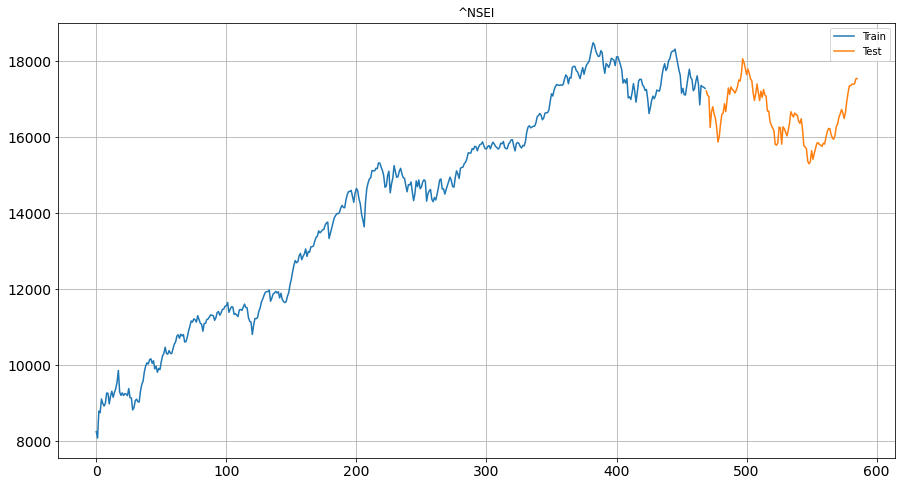

In [12]:
train_data.Close.plot(figsize=(15,8), title= ticker, fontsize=14, label='Train')
test_data.Close.plot(figsize=(15,8), title= ticker, fontsize=14, label='Test')
plt.legend()
plt.grid()
plt.show()

In [13]:
!pip install autots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 486 kB 7.6 MB/s 


In [14]:
from autots import AutoTS

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
model = AutoTS(forecast_length=2, frequency='infer',  ensemble='simple', drop_data_older_than_periods=200 )

In [ ]:
mod = model.fit(df, date_col = 'Date', value_col = 'Close', id_col = None)

Inferred frequency is: None
Frequency is 'None'! Input frequency not recognized.
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 10
Epoch 1/50
7/7 [==============================] - 11s 6ms/step - loss: 0.3835
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 0.3790
Epoch 3/50
7/7 [==============================] - 0s 10ms/step - loss: 0.3765
Epoch 4/50
7/7 [==============================] - 0s 13ms/step - loss: 0.3683
Epoch 5/50
7/7 [==============================] - 0s 12ms/step - loss: 0.3586
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 0.3529
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 0.3481
Epoch 8/50
7/7 [==============================] - 0s 5ms/step - loss: 0.3381
Epoch 9/50
7/7 [==============================] - 0s 5ms/step - loss: 0.3345
Epoch 10/50
7/7 [==============================] - 0s 7ms/step - loss: 0.3215
Epoch 11/50
7/7 [==============================] - 0s 14ms/step - loss: 0.3250
Epoch 12/50
7/7 [==============================] - 0s 12ms/step - loss: 0.3211

## Best Model

In [ ]:
print(mod)

## Prediction and Forecasting

In [ ]:
pred = model.predict()
forecast = pred.forecast
model_results = model.results()
validation = model.results('validation')

Let’s print the forecast of the dataset for the future stock price. Also, we will see the validation of the model results. 

In [ ]:
# Forecast
print(forecast)

In [ ]:
fcast = forecast.astype(int)

In [ ]:
print(ticker)
print(fcast)